# Analyzing the Keeling Curve

## Libraries

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chisquare
import scipy.stats as stats

### Import functions and data

In [23]:
%run mauna_loa_co2_monthly_mean_data.py
%run functions.py

   Year  Month  Decimal Date  Monthly Mean CO2  De-seasonalized  Days  \
0  1958      3     1958.2027            315.71           314.44    26   
1  1958      4     1958.2877            317.45           315.16    26   
2  1958      5     1958.3699            317.51           314.69    26   
3  1958      6     1958.4548            317.27           315.15    26   
4  1958      7     1958.5370            315.87           315.20    26   

   Std Dev of Days  Monthly Mean Uncertainty  Yearly Mean Time  \
0             0.48                      0.18           1958.58   
1             0.48                      0.18           1958.58   
2             0.48                      0.18           1958.58   
3             0.48                      0.18           1958.58   
4             0.48                      0.18           1958.58   

   Yearly Mean CO2  Yearly Mean Uncertainty  
0          315.237                     0.18  
1          315.237                     0.18  
2          315.237        

### Keeling Curve Plot

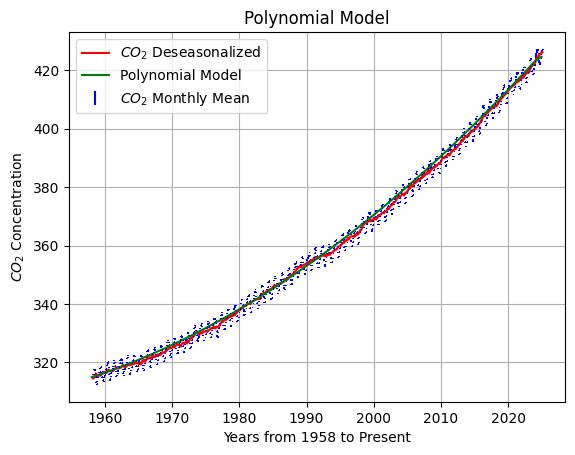

Reduced Chi-Squared Value: 15.747085416148346


In [25]:
polynomial_model = fit_model(data["Yearly Mean Time"], data["Yearly Mean CO2"], data["Yearly Mean Uncertainty"], [1, 1, 1])

plt.errorbar(data["Decimal Date"], data["Monthly Mean CO2"], yerr=data["Monthly Mean Uncertainty"], fmt='b,', label=r'$CO_2$ Monthly Mean')
plt.plot(data["Decimal Date"], data["De-seasonalized"],'r-', label = r'$CO_2$ Deseasonalized')
plt.plot(data["Year"], polynomial_model[2], 'g-', label = r'Polynomial Model')
plt.title('Polynomial Model')
plt.xlabel('Years from 1958 to Present')
plt.ylabel(r'$CO_2$ Concentration')
plt.legend()
plt.grid()
plt.show()

reduced_chi_sqr_value = reduced_chi_sqr(data["Yearly Mean CO2"], data["Yearly Mean Uncertainty"], polynomial_model[2], len(polynomial_model[0]))

print("Reduced Chi-Squared Value:", reduced_chi_sqr_value)


### Augmented Dickey Fuller Test

$H_0$ The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

$H_a$ The time series is stationary.

$\alpha = 0.05$

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

In [33]:
from statsmodels.tsa.stattools import adfuller

 
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

adf_test(data["De-seasonalized"])
adf_test(data["Yearly Mean CO2"]) 

Results of Dickey-Fuller Test:
Test Statistic                   6.231781
p-value                          1.000000
#Lags Used                      13.000000
Number of Observations Used    790.000000
Critical Value (1%)             -3.438655
Critical Value (5%)             -2.865205
Critical Value (10%)            -2.568722
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   6.063474
p-value                          1.000000
#Lags Used                      21.000000
Number of Observations Used    782.000000
Critical Value (1%)             -3.438740
Critical Value (5%)             -2.865243
Critical Value (10%)            -2.568742
dtype: float64


Conclusion: The p-value for the deseasonalized $CO_2$ is greater than 0.05 so we fail to reject the null hypothesis. What this means is that the time series is nonstationary i.e. it has some time-dependent structure and does not have constant variance over time.

### KPSS Test

$H_0$ The time series is stationary.

$H_a$ The time series is nonstationary.

KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

Types of Stationarity
Let us understand the different types of stationarities and how to interpret the results of the above tests.

- Strict Stationary: A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.

- Trend Stationary: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.

- Difference Stationary: A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.

Case 1: Both tests conclude that the series is not stationary -> series is not stationary
Case 2: Both tests conclude that the series is stationary -> series is stationary
Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

In [ ]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

kpss_test(data["De-seasonalized"])
kpss_test(data["Yearly Mean CO2"])

Results of KPSS Test:
Test Statistic            4.264567
p-value                   0.010000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\iankn\AppData\Local\Temp\ipykernel_30800\3060493095.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


### Calculate Auto-Correlation and Partial Auto-Correlation

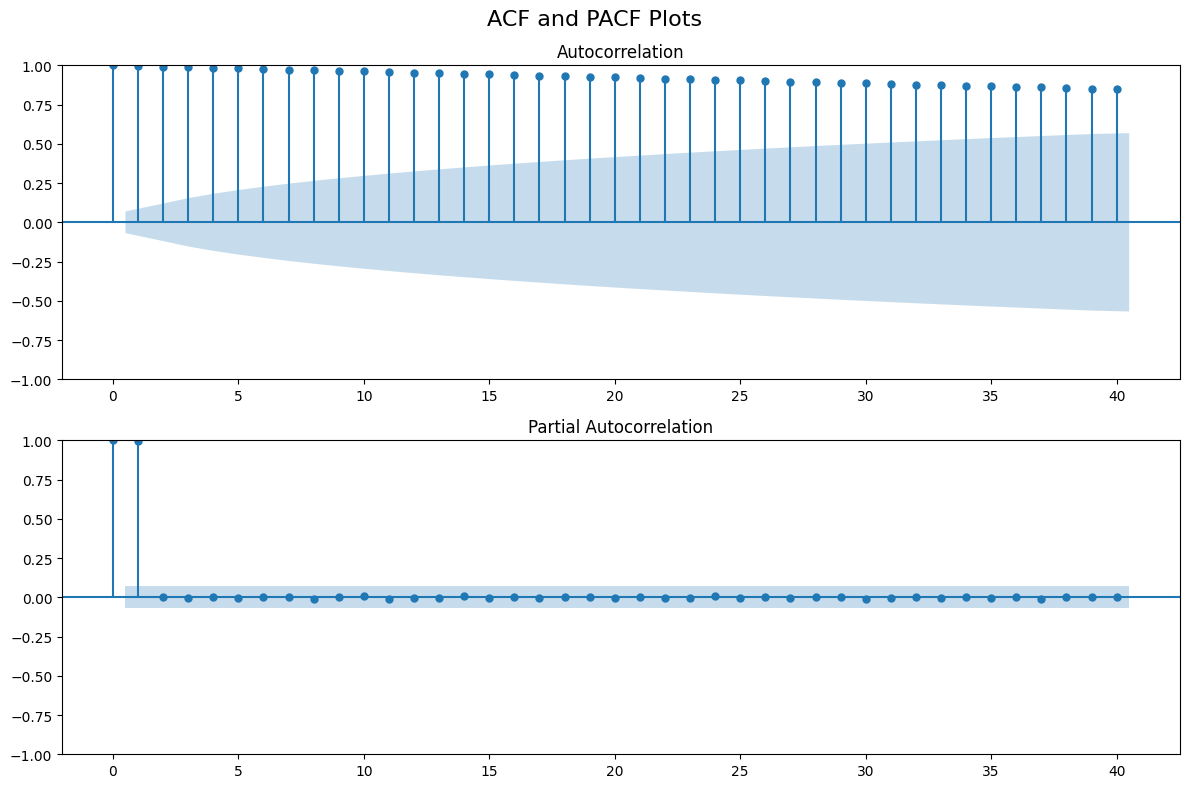

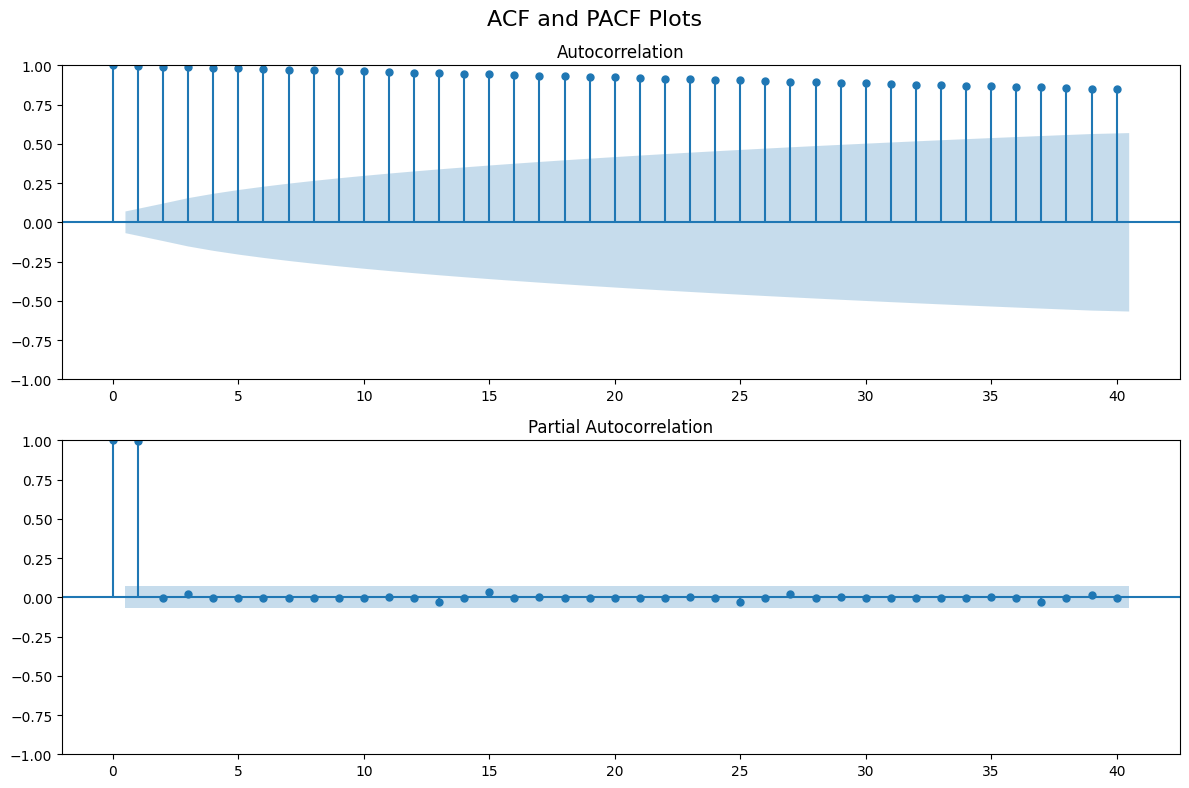

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(data, lags=40):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    fig.suptitle("ACF and PACF Plots", fontsize=16)

    # ACF Plot
    ax[0].set_title("Autocorrelation Function (ACF)")
    plot_acf(data, lags=lags, ax=ax[0], alpha=0.05)

    # PACF Plot
    ax[1].set_title("Partial Autocorrelation Function (PACF)")
    plot_pacf(data, lags=lags, ax=ax[1], alpha=0.05)

    plt.tight_layout()
    plt.show()

plot_acf_pacf(data["De-seasonalized"], lags=40)
plot_acf_pacf(data["Yearly Mean CO2"], lags=40)


The ACF and PACF are showing strong signs of non-stationarity.

### Rolling Statistics Test

### Detrending the Time Series

### Difference the Time Series

In [ ]:
# Differencing

# Seasonal Differencing


# Transformation

# Log Transformation

# Square Root Transformation

# Box-Cox Transformation